In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
test = []
with open('Data/Point_dataset.txt') as f:
    for line in f.readlines():
        test.append(line.split())

df = pd.DataFrame(data=test)
df = df.astype(float)
df.columns = ['x', 'y', 'z']
df

,x,y,z
0,44222.21,35600.90,14.974396
1,60003.40,26172.72,14.078868
2,44300.61,35291.79,14.261570
3,52776.47,33453.18,15.347562
4,49636.39,30697.34,14.422570
...,...,...,...
436,65193.40,26832.74,9.374795
437,50022.04,40606.42,7.636603
438,43745.18,35114.25,14.622497
439,71483.43,25152.76,11.014532


In [3]:
test = [0]*5
dfs = [0]*5

for i in range(len(test)):

    test[i] = []

    with open(f'Data/Map_{i + 1}.txt') as f:

        for line in f.readlines():

            test[i].append(line.split())

    dfs[i] = pd.DataFrame(data=test[i])

    dfs[i] = dfs[i].astype(float)

    dfs[i].columns = [f'x{i}', f'y{i}', f'z{i}']

    dfs[i]



In [4]:
pdConcat = pd.DataFrame(pd.concat(dfs, axis=1))
pdConcat = pdConcat.drop(columns=['x1','x0','x3','x4','y1','y0','y3','y4',])
pdConcat.rename(columns={'x2': 'x', 'y2': 'y'} , inplace=True)

In [5]:
pdConcat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197106 entries, 0 to 1197105
Data columns (total 7 columns):
 #   Column  Non-Null Count    Dtype  
---  ------  --------------    -----  
 0   z0      1196495 non-null  float64
 1   z1      1196495 non-null  float64
 2   x       1197106 non-null  float64
 3   y       1197106 non-null  float64
 4   z2      1197106 non-null  float64
 5   z3      1197106 non-null  float64
 6   z4      1196495 non-null  float64
dtypes: float64(7)
memory usage: 63.9 MB


In [6]:
pdConcat

,z0,z1,x,y,z2,z3,z4
0,0.15633,0.11137,68226.71,24467.0,40.17626,4145.4155,1.67671
1,0.15675,0.11094,68239.21,24467.0,40.34349,4142.3389,1.67665
2,0.15718,0.11095,68251.71,24467.0,40.47934,4139.9224,1.67664
3,0.15698,0.11070,68264.21,24467.0,40.69317,4138.2324,1.67664
4,0.15696,0.11088,68276.71,24467.0,40.84084,4138.5000,1.67669
...,...,...,...,...,...,...,...
1197101,NaN,NaN,53251.71,46942.0,37.70777,4022.9558,NaN
1197102,NaN,NaN,53264.21,46942.0,37.66273,4022.3235,NaN
1197103,NaN,NaN,53276.71,46942.0,37.21101,4023.4590,NaN
1197104,NaN,NaN,53289.21,46942.0,40.98548,4016.9272,NaN


In [7]:
for c in pdConcat.columns:
        
    pdConcat[c].fillna(pdConcat[c].mean(), inplace=True)

In [8]:
pdConcat

,z0,z1,x,y,z2,z3,z4
0,0.156330,0.111370,68226.71,24467.0,40.17626,4145.4155,1.676710
1,0.156750,0.110940,68239.21,24467.0,40.34349,4142.3389,1.676650
2,0.157180,0.110950,68251.71,24467.0,40.47934,4139.9224,1.676640
3,0.156980,0.110700,68264.21,24467.0,40.69317,4138.2324,1.676640
4,0.156960,0.110880,68276.71,24467.0,40.84084,4138.5000,1.676690
...,...,...,...,...,...,...,...
1197101,0.155732,0.123908,53251.71,46942.0,37.70777,4022.9558,1.677147
1197102,0.155732,0.123908,53264.21,46942.0,37.66273,4022.3235,1.677147
1197103,0.155732,0.123908,53276.71,46942.0,37.21101,4023.4590,1.677147
1197104,0.155732,0.123908,53289.21,46942.0,40.98548,4016.9272,1.677147


In [9]:
pdConcat.loc[pdConcat['z1'].isna() ]

,z0,z1,x,y,z2,z3,z4


In [10]:
pdConcat.loc[pdConcat['z2'].isna()]

,z0,z1,x,y,z2,z3,z4


In [11]:
plt.scatter(pdConcat['x0'], pdConcat['y0'], c=pdConcat['z3'], cmap='jet',vmin=pdConcat['z3'].min(), vmax=pdConcat['z3'].max())
plt.colorbar()
plt.show()

KeyError: 'x0'

In [ ]:
plt.scatter(pdConcat['x0'], pdConcat['y0'], c=pdConcat['z3'], cmap='jet',vmin=pdConcat['z3'].min(), vmax=pdConcat['z3'].max())
plt.colorbar()
plt.show()

KeyError: 'x0'

In [12]:
coords = pdConcat.loc[:, ['x', 'y']]
coords = coords.sort_values(by=['x', 'y'])
coords = np.array(coords)
coords

array([[43826.71, 35592.  ],
       [43826.71, 35617.  ],
       [43826.71, 35642.  ],
       ...,
       [72426.71, 25892.  ],
       [72426.71, 25917.  ],
       [72439.21, 25742.  ]])

In [13]:
pointsCoords = df.loc[:, ['x', 'y']]
pointsCoords['dist'] = 0
pointsCoords = np.array(pointsCoords)
pointsCoords

array([[44222.21, 35600.9 ,     0.  ],
       [60003.4 , 26172.72,     0.  ],
       [44300.61, 35291.79,     0.  ],
       ...,
       [43745.18, 35114.25,     0.  ],
       [71483.43, 25152.76,     0.  ],
       [51554.73, 46308.47,     0.  ]])

In [14]:
pointsCoords[1][0:2]

array([60003.4 , 26172.72])

In [15]:
np.linalg.norm(coords-pointNow, axis=1)

NameError: name 'pointNow' is not defined

In [16]:
for i in range(len(pointsCoords)):
                
    pointNow = pointsCoords[i][0:2]

    distances = np.linalg.norm(coords-pointNow, axis=1)
    min_index = np.argmin(distances)
    #print(f"the closest point is {coords[min_index]}, at a distance of {distances[min_index]}")
    
    pointsCoords[i][0:2] = coords[min_index]
    pointsCoords[i][2] = distances[min_index]

In [17]:
pointsCoords = pd.DataFrame(pointsCoords)
pointsCoords.columns = ['x', 'y', 'dist']
pointsCoords['target'] = df['z']
pointsCoords

,x,y,dist,target
0,44226.71,35592.0,9.972963,14.974396
1,60001.71,26167.0,5.964436,14.078868
2,44301.71,35292.0,1.119866,14.261570
3,52776.71,33442.0,11.182576,15.347562
4,49639.21,30692.0,6.038874,14.422570
...,...,...,...,...
436,65189.21,26842.0,10.163843,9.374795
437,50026.71,40617.0,11.564830,7.636603
438,43839.21,35117.0,94.070205,14.622497
439,71376.71,25542.0,403.604926,11.014532


In [18]:
pointsCoords.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 441 entries, 0 to 440
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x       441 non-null    float64
 1   y       441 non-null    float64
 2   dist    441 non-null    float64
 3   target  441 non-null    float64
dtypes: float64(4)
memory usage: 13.9 KB


<Axes: >

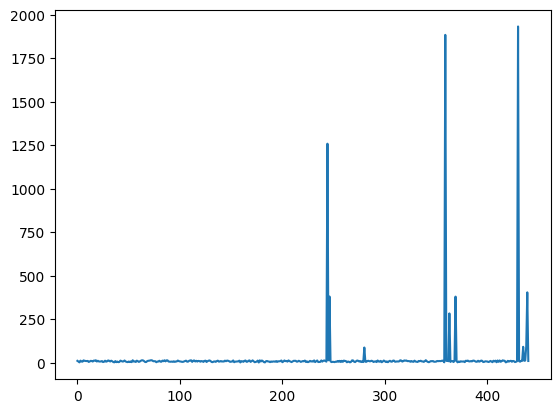

In [19]:
pointsCoords['dist'].plot()

In [20]:
dataToLearn = pointsCoords.loc[pointsCoords['dist'] < 50]
dataToLearn


,x,y,dist,target
0,44226.71,35592.0,9.972963,14.974396
1,60001.71,26167.0,5.964436,14.078868
2,44301.71,35292.0,1.119866,14.261570
3,52776.71,33442.0,11.182576,15.347562
4,49639.21,30692.0,6.038874,14.422570
...,...,...,...,...
433,62851.71,35892.0,9.386165,9.893741
434,44514.21,33617.0,9.787768,16.224642
436,65189.21,26842.0,10.163843,9.374795
437,50026.71,40617.0,11.564830,7.636603


<Axes: >

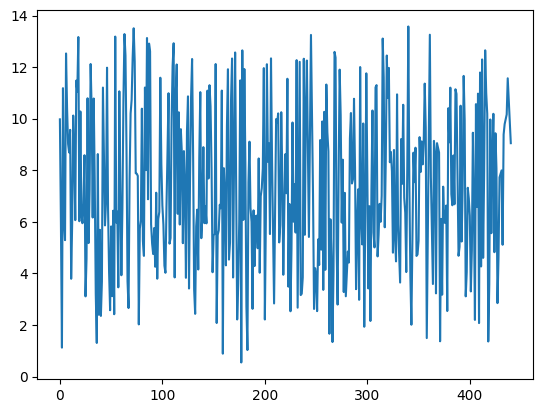

In [21]:
dataToLearn['dist'].plot()

In [22]:
dataset = pd.merge(dataToLearn, pdConcat, on=['x', 'y'], suffixes=[f'{i}', f'_{i + 1}'])
dataset.drop(columns=['dist'],inplace=True)
dataset

,x,y,target,z0,z1,z2,z3,z4
0,44226.71,35592.0,14.974396,0.13844,0.11632,41.38491,4045.6523,1.68532
1,60001.71,26167.0,14.078868,0.15926,0.11405,36.27350,4199.0898,1.67443
2,44301.71,35292.0,14.261570,0.15125,0.11848,41.70690,4072.4370,1.68579
3,52776.71,33442.0,15.347562,0.14372,0.11356,37.22216,4280.4648,1.67490
4,49639.21,30692.0,14.422570,0.16720,0.14344,37.39187,4195.1157,1.67995
...,...,...,...,...,...,...,...,...
426,62851.71,35892.0,9.893741,0.17353,0.11965,35.56974,4301.9971,1.67989
427,44514.21,33617.0,16.224642,0.15314,0.13286,38.61294,4157.5146,1.68303
428,65189.21,26842.0,9.374795,0.15240,0.12603,35.60380,4270.1318,1.67435
429,50026.71,40617.0,7.636603,0.16208,0.11609,41.53450,4174.1216,1.68081


In [23]:
from sklearn.model_selection import train_test_split
from catboost import CatBoostRegressor, Pool

In [24]:
dataset['target']

0      14.974396
1      14.078868
2      14.261570
3      15.347562
4      14.422570
         ...    
426     9.893741
427    16.224642
428     9.374795
429     7.636603
430    16.902573
Name: target, Length: 431, dtype: float64

In [25]:
X_train, X_test, Y_train, Y_test = train_test_split(dataset.drop(columns=['target']), dataset['target'] , test_size=0.01, random_state=42)

In [26]:
#X_train.iloc[:,:2]

In [27]:
model = CatBoostRegressor(iterations=2000, depth=10, learning_rate=0.05, loss_function='RMSE')

grid = {'iterations': [100, 400, 1000],
        'learning_rate': [0.03, 0.1],
        'depth': [2, 4, 6, 8],  
        'l2_leaf_reg': [0.2, 0.5, 1, 3]}
model.grid_search(grid, Pool(X_train, Y_train))

0:	learn: 12.8952434	test: 13.4029420	best: 13.4029420 (0)	total: 132ms	remaining: 13.1s
1:	learn: 12.5281009	test: 13.0346612	best: 13.0346612 (1)	total: 133ms	remaining: 6.51s
2:	learn: 12.1678562	test: 12.6651410	best: 12.6651410 (2)	total: 133ms	remaining: 4.3s
3:	learn: 11.8221906	test: 12.3169567	best: 12.3169567 (3)	total: 133ms	remaining: 3.2s
4:	learn: 11.4856825	test: 11.9792203	best: 11.9792203 (4)	total: 134ms	remaining: 2.54s
5:	learn: 11.1623169	test: 11.6552648	best: 11.6552648 (5)	total: 134ms	remaining: 2.1s
6:	learn: 10.8471885	test: 11.3400202	best: 11.3400202 (6)	total: 134ms	remaining: 1.78s
7:	learn: 10.5410771	test: 11.0350078	best: 11.0350078 (7)	total: 135ms	remaining: 1.55s
8:	learn: 10.2473986	test: 10.7368734	best: 10.7368734 (8)	total: 136ms	remaining: 1.37s
9:	learn: 9.9628915	test: 10.4492403	best: 10.4492403 (9)	total: 137ms	remaining: 1.23s
10:	learn: 9.6879819	test: 10.1728978	best: 10.1728978 (10)	total: 137ms	remaining: 1.11s
11:	learn: 9.4209939	tes

KeyboardInterrupt: 

Text(0.5, 0, 'CatBoost Feature Importance')

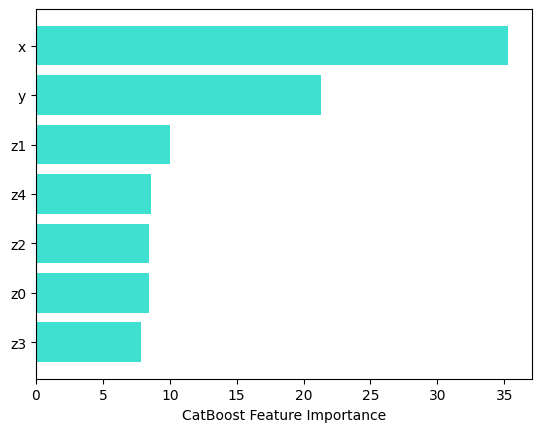

In [ ]:
sorted_feature_importance = model.feature_importances_.argsort()
plt.barh(X_train.columns[sorted_feature_importance], 
        model.feature_importances_[sorted_feature_importance], 
        color='turquoise')
plt.xlabel("CatBoost Feature Importance")

In [29]:
model = CatBoostRegressor(iterations=2000, depth=10, learning_rate=0.05, loss_function='RMSE')

lernData = model.fit(X_train, Y_train, plot=False)

0:	learn: 2.7730035	total: 235ms	remaining: 7m 50s
1:	learn: 2.7061892	total: 415ms	remaining: 6m 54s
2:	learn: 2.6482184	total: 550ms	remaining: 6m 5s
3:	learn: 2.5903344	total: 624ms	remaining: 5m 11s
4:	learn: 2.5384816	total: 732ms	remaining: 4m 52s
5:	learn: 2.4885008	total: 816ms	remaining: 4m 31s
6:	learn: 2.4295039	total: 859ms	remaining: 4m 4s
7:	learn: 2.3764918	total: 888ms	remaining: 3m 41s
8:	learn: 2.3324485	total: 916ms	remaining: 3m 22s
9:	learn: 2.2918121	total: 944ms	remaining: 3m 7s
10:	learn: 2.2499406	total: 972ms	remaining: 2m 55s
11:	learn: 2.2125379	total: 1s	remaining: 2m 46s
12:	learn: 2.1751562	total: 1.03s	remaining: 2m 38s
13:	learn: 2.1323165	total: 1.08s	remaining: 2m 32s
14:	learn: 2.0945104	total: 1.1s	remaining: 2m 26s
15:	learn: 2.0539059	total: 1.13s	remaining: 2m 20s
16:	learn: 2.0197320	total: 1.17s	remaining: 2m 16s
17:	learn: 1.9854663	total: 1.22s	remaining: 2m 14s
18:	learn: 1.9607311	total: 1.27s	remaining: 2m 12s
19:	learn: 1.9296336	total: 1

In [30]:
preds = model.predict(X_test)
a = np.sqrt(sum((np.array(preds) - np.array(Y_test).reshape(len(X_test),))**2)/len(X_test))
a

0.6059562049588061

In [31]:
preds = model.predict(pdConcat)
preds

array([14.06282864, 14.1323711 , 14.12593589, ..., 13.81500918,
       13.84112573, 13.86718785])

In [32]:
newPdToSend = pdConcat[['x','y']]
newPdToSend['z'] = preds
newPdToSend

C:\Users\maksi\AppData\Local\Temp\ipykernel_10056\692220532.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  newPdToSend['z'] = preds


,x,y,z
0,68226.71,24467.0,14.062829
1,68239.21,24467.0,14.132371
2,68251.71,24467.0,14.125936
3,68264.21,24467.0,14.216177
4,68276.71,24467.0,14.209276
...,...,...,...
1197101,53251.71,46942.0,13.787921
1197102,53264.21,46942.0,13.768901
1197103,53276.71,46942.0,13.815009
1197104,53289.21,46942.0,13.841126


Text(0.5, 0, 'CatBoost Feature Importance')

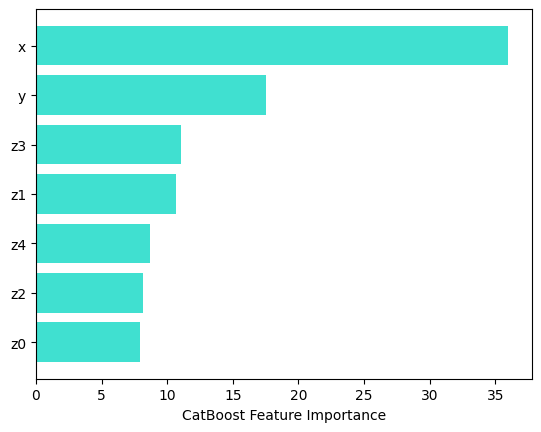

In [33]:
sorted_feature_importance = model.feature_importances_.argsort()
plt.barh(X_train.columns[sorted_feature_importance], 
        model.feature_importances_[sorted_feature_importance], 
        color='turquoise')
plt.xlabel("CatBoost Feature Importance")

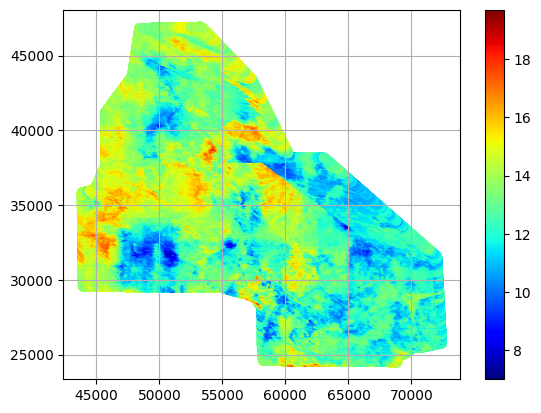

In [35]:
plt.scatter(pdConcat['x'].to_numpy(), pdConcat['y'].to_numpy(), c=preds, cmap='jet', vmin=preds.min(), vmax=preds.max())
plt.colorbar()
plt.grid()
plt.show()

In [36]:
from sklearn.metrics import mean_squared_error as mse
pred_vals = model.predict(dataset.drop(columns=['target']).to_numpy())
acc = np.sqrt(mse(pred_vals, dataset['target'].to_numpy()))
acc

0.06538614744316507

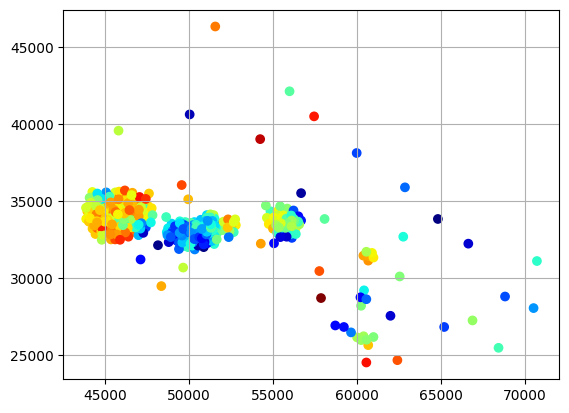

In [ ]:
plt.scatter(dataset['x'], dataset['y'], c=dataset['target'], cmap='jet', vmin=dataset['target'].min(), vmax=dataset['target'].max())
plt.grid()

In [ ]:
test = []
with open('Data/Result_schedule.txt') as f:
    for line in f.readlines():
        test.append(line.split())

dfRes = pd.DataFrame(data=test)
dfRes = dfRes.astype(float)
dfRes.columns = ['x', 'y', 'z']
dfRes

,x,y,z
0,68239.21,24467.0,NaN
1,68251.71,24467.0,NaN
2,68264.21,24467.0,NaN
3,68276.71,24467.0,NaN
4,68289.21,24467.0,NaN
...,...,...,...
1196585,53264.21,46942.0,NaN
1196586,53276.71,46942.0,NaN
1196587,53289.21,46942.0,NaN
1196588,53301.71,46942.0,NaN


In [ ]:
dfRes1 = dfRes.copy()

In [ ]:
dfRes = pd.merge(dfRes1, newPdToSend, on=['x', 'y'], how='left')
dfRes.fillna(dfRes['z_y'].median(), inplace=True)
dfRes.drop(columns=['z_x'], inplace=True)
dfRes.rename(columns={'z_y':'z'}, inplace=True)
dfRes

,x,y,z
0,68239.21,24467.0,13.270380
1,68251.71,24467.0,13.425605
2,68264.21,24467.0,13.208282
3,68276.71,24467.0,13.213999
4,68289.21,24467.0,12.759716
...,...,...,...
1196585,53264.21,46942.0,16.498479
1196586,53276.71,46942.0,16.860723
1196587,53289.21,46942.0,15.655414
1196588,53301.71,46942.0,15.995106


In [ ]:
dfRes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1196484 entries, 0 to 1196483
Data columns (total 4 columns):
 #   Column  Non-Null Count    Dtype  
---  ------  --------------    -----  
 0   x       1196484 non-null  float64
 1   y       1196484 non-null  float64
 2   z440    0 non-null        float64
 3   z_441   1196484 non-null  float64
dtypes: float64(4)
memory usage: 36.5 MB


In [ ]:
dfRes.to_csv('test1.txt', sep='\t', index=False)

In [ ]:
from main import export_dataset_to_file

In [ ]:
export_dataset_to_file(dfRes)